# Flower Classification by using Decision Tree Classifier
By- Rhushikesh Ugemuge 

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [8]:
iris = datasets.load_iris()

print('Dataset Structure=',dir(iris))

Dataset Structure= ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [9]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x])

In [13]:
print('Unique target values=',df['target'].unique())

df.sample(10)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
127,6.1,3.0,4.9,1.8,2,virginica
84,5.4,3.0,4.5,1.5,1,versicolor
108,6.7,2.5,5.8,1.8,2,virginica
43,5.0,3.5,1.6,0.6,0,setosa
128,6.4,2.8,5.6,2.1,2,virginica
92,5.8,2.6,4.0,1.2,1,versicolor
34,4.9,3.1,1.5,0.2,0,setosa
114,5.8,2.8,5.1,2.4,2,virginica
66,5.6,3.0,4.5,1.5,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa


In [15]:
# Label = 0 (setosa)
df[df.target == 0].head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [17]:
# Label = 1 (versicolor)
df[df.target == 1].head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


In [19]:
# Label = 2 (verginica)
df[df.target == 2].head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica
107,7.3,2.9,6.3,1.8,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica
109,7.2,3.6,6.1,2.5,2,virginica


In [21]:
# Lets create feture matrtix X and y labels
x = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['target']

print('X shape=', x.shape)
print('Y shape=', y.shape)

X shape= (150, 4)
Y shape= (150,)


In [23]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 1)
print('X_train dimension =', x_train.shape)
print('X_test dimension =', x_test.shape)
print('Y_train dimension =', y_train.shape)
print('Y_test dimension =', y_test.shape)

X_train dimension = (120, 4)
X_test dimension = (30, 4)
Y_train dimension = (120,)
Y_test dimension = (30,)


In [25]:
cls = tree.DecisionTreeClassifier(random_state = 1)
cls.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
print('Actual value of species for 10th training example=',iris.target_names[y_test.iloc[10]][0])
print('Predicted value of species for 10th training example=',iris.target_names[cls.predict([x_test.iloc[10]])][0])

Actual value of species for 10th training example= v
Predicted value of species for 10th training example= versicolor


In [29]:
print('Actual value of species for 20th training example=',iris.target_names[y_test.iloc[20]][0])
print('Predicted value of species for 20th training example=',iris.target_names[cls.predict([x_test.iloc[20]])][0])

Actual value of species for 20th training example= v
Predicted value of species for 20th training example= versicolor


In [31]:
print('Actual value of species for 30th training example=',iris.target_names[y_test.iloc[29]][0])
print('Predicted value of species for 30th training example=',iris.target_names[cls.predict([x_test.iloc[29]])][0])

Actual value of species for 30th training example= v
Predicted value of species for 30th training example= virginica


In [32]:
cls.score(x_test, y_test)

0.9666666666666667

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

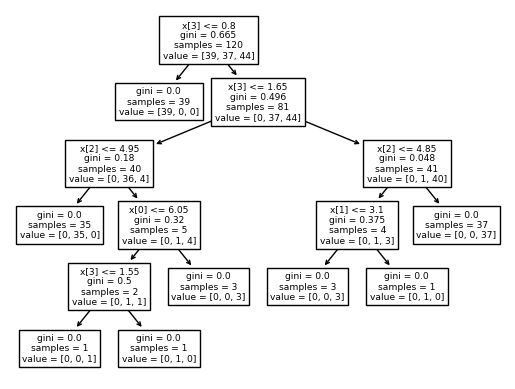

In [33]:
tree.plot_tree(cls)

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [45]:
# Input fron the user
sepal_length_cm = float(input("Enter new sepal length (cm):"))
sepal_width_cm = float(input("Enter new sepal width (cm):"))
petal_length_cm = float(input("Enter new petal length (cm):"))
petal_width_cm = float(input("Enter new petal width (cm):"))

# Prepare the new data point for prediction
new_flower = [[sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm]]

# Transform the data using the scaler (assuming 'sc' is already defined)
transformed_new_flower = sc.transform(new_flower)

# Predict the species
result = cls.predict(transformed_new_flower)

# Output
if result == 0:
     print("The new flower species may be Setosa")
elif result == 1:
    print("The new flower species may be versicolor")
else:
     print("The new flower species may be Virginica")

Enter new sepal length (cm): 1.2
Enter new sepal width (cm): 1.5
Enter new petal length (cm): 3.6
Enter new petal width (cm): 4.7


The new flower species may be Virginica
